## Práctica 3.Transformaciones y Operaciones con Imágenes.


## Ejercicios
<ol>
    <li>Obtener para la imagen "fantastic_village.jpg" la imagen negada
     <li> Obtener una imagen "blending" de las dos imágenes "fantastic_village.jpg" y "stars.jpg". Una imagen blending es sumar las dos imágenes pero ponderando previamente las imágenes originales por dos factores f1 y f2 tal que f1+f2=1.
     <li> Obtener la imagen and, or y xor de la imagen "fantastic_village.jpg" y "stars.jpg"
      <li> Obtener la funcion de transferencia $f(x)=sin(x*\pi/K)$. Para diferentes valores de k.Aplicar la función de transferencia a la imagen "dalmata.jpg"
      <li> Aplicar la transformada gamma sobre las imagenes "low_contrast2.png" y "low_contrast3.png". Comparar con los mejores resultados de aplicar la función imadjust.
      <li> Ecualizar la imagen "patio_leones.ppm"     
    <li> <b> Lo que oculta una imagen.</b> Estas dos imágenes
<table style="width: 390px; height: 266px;" border="0">        
<tr><td><a title="Original" href="castillo.pgm"><img src="castillo.png" width="256" height="256"></a>
    </td>    
    <td><a title="Imagen con otra imagen oculta"
        href="Castillo_oculto2bits.pgm"><img src="Castillo_oculto2bits.png" width="256" height="256"></a></td></tr>
</table>    
<p>A priori parecen la misma imagen. Sin embargo la imagen de la derecha oculta algo, en particular oculta una versión umbralizada de la  imagen de <img src="vacas.png" width="256" height="256"> vacas. </p>
<p>Dos posibles imágenes ocultas son:</p>
<table style="width: 390px; height: 266px;" border="0">
    <tbody>
        <tr>
            <td><a href="recuperada_castillo.pgm"><img src="recuperada_castillo.png" alt="imagen oculta" width="256" height="256"></a></td>
            <td><a href="recuperada_castillo2.pgm"><img src="recuperada_castillo2.png" width="256" height="256"></a></td>
        </tr>
    </tbody>
</table>
<p></p>
<p></p>
<p></p>
<p></p>
<p>Lo único que sabemos de esta imagen es que simplemente tienen 3 niveles de gris: 0 128 y 255 (imagen de la derecha de vacas). Podrian ser dos niveles tambien 0 252 (imagen de la izquierda de vacas). Explica como se ha ocultado la imagen de las vacas en
    el castillo y como se ha recuperado. Dar el código en Python para obtener la imagen oculta y también el código para ocultar la imagen vacas en el castillo.</p>
<p></p>
<p></p>
        
</ol>        

###### 1º Obtener para la imagen "fantastic_village.jpg" la imagen negada

Text(0.5, 1.0, 'Imagen negada')

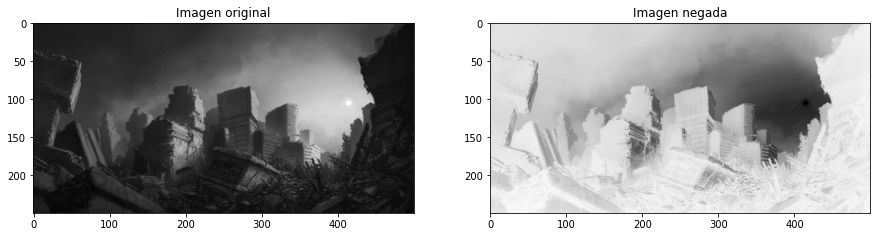

In [15]:
#Negamos la imagen empleando una función de transferencia negativa
img=cv2.imread("fantastic_village.jpg",0)

ind=np.arange(256)
negativo= 255-ind

plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.imshow(img,"gray")
plt.title("Imagen original")
plt.subplot(1,2,2)
plt.imshow(negativo[img],"gray")
plt.title("Imagen negada")

###### 2º Obtener una imagen "blending" de las dos imágenes "fantastic_village.jpg" y "stars.jpg". Una imagen blending es sumar las dos imágenes pero ponderando previamente las imágenes originales por dos factores f1 y f2 tal que f1+f2=1.

Text(0.5, 1.0, 'Imagen Blending (0.6+0.4)')

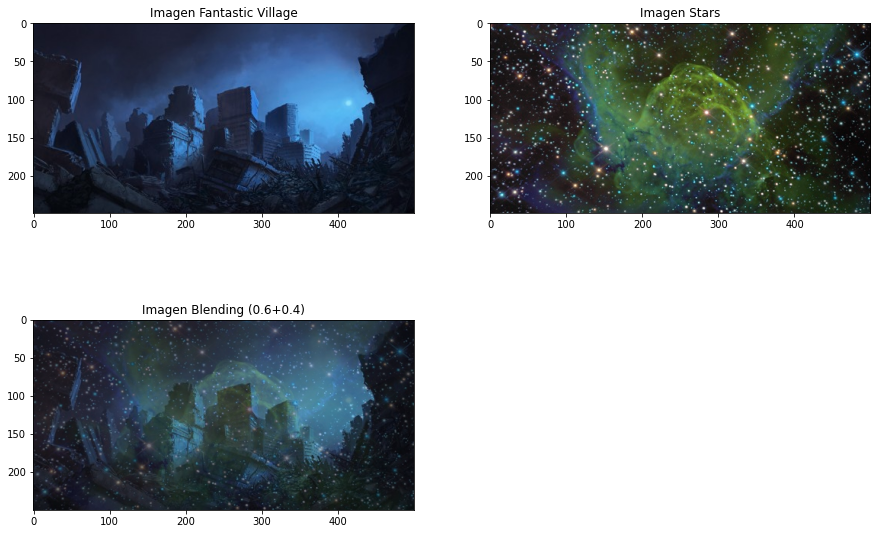

In [16]:
img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")
#Ponderamos un 0.6 la primera imagen y un 0.4 la segunda.
img3 = cv2.addWeighted(img1,0.6,img2,0.4,0)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img1)
plt.title("Imagen Fantastic Village")
plt.subplot(2,2,2)
plt.imshow(img2)
plt.title("Imagen Stars")
plt.subplot(2,2,3)
plt.imshow(img3)
plt.title("Imagen Blending (0.6+0.4)")

###### 3º Obtener la imagen and, or y xor de la imagen "fantastic_village.jpg" y "stars.jpg"

Text(0.5, 1.0, 'Imagen XOR')

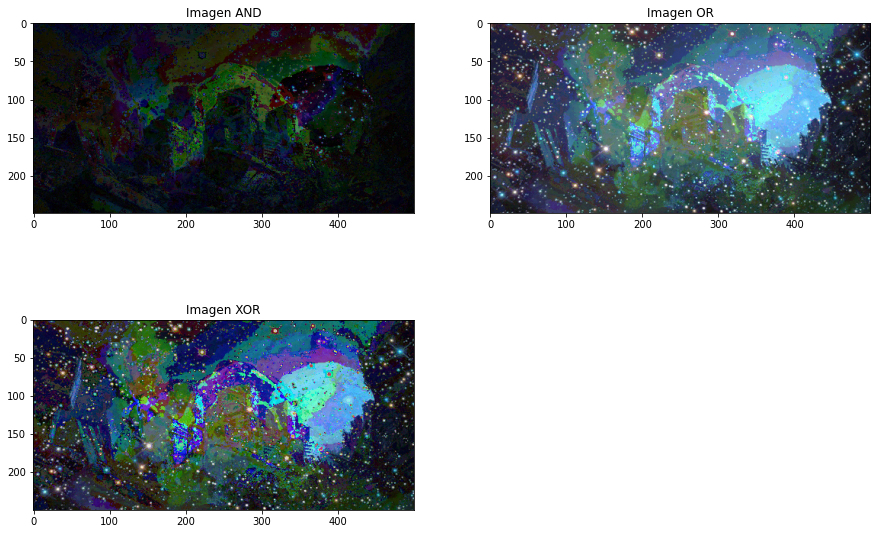

In [17]:
img1 = cv2.imread("fantastic_village.jpg")
img2 = cv2.imread("stars.jpg")

#Imagenes and, or & xor
img_and=cv2.bitwise_and(img1,img2)
img_or=cv2.bitwise_or(img1,img2)
img_xor=cv2.bitwise_xor(img1,img2)

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(img_and)
plt.title("Imagen AND")
plt.subplot(2,2,2)
plt.imshow(img_or)
plt.title("Imagen OR")
plt.subplot(2,2,3)
plt.imshow(img_xor)
plt.title("Imagen XOR")

###### 4º Obtener la funcion de transferencia  𝑓(𝑥)=𝑠𝑖𝑛(𝑥∗𝜋/𝐾) . Para diferentes valores de k.Aplicar la función de transferencia a la imagen "dalmata.jpg"

Text(0.5, 1.0, 'Imagen k=4')

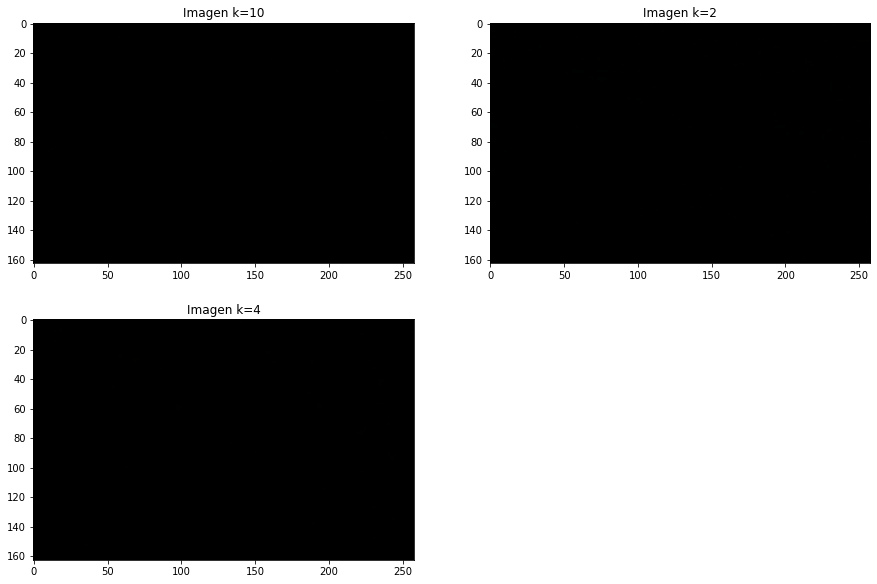

In [18]:
import math

img = cv2.imread("dalmata.jpg")

#Definimos la funcion de transferencia
def transferenciaK(k):
    ind=np.arange(256)
    
    transf = ind.copy()
    
    #aplicamos la función para cada valor del vector acotando que si supera el 255 sera 255 y si es menor de 0 será 0
    for i in range(len(transf)):
        x = math.sin(i*math.pi/k)
        if(x > 255):
            transf[i] = 255
        if(x < 0):
            transf[i] = 0
        else:
            transf[i] = x
        
    return(transf)

k10 = transferenciaK(10)
k4 = transferenciaK(4)
k2 = transferenciaK(2) 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(k10[img])
plt.title("Imagen k=10")
plt.subplot(2,2,2)
plt.imshow(k2[img])
plt.title("Imagen k=2")
plt.subplot(2,2,3)
plt.imshow(k4[img])
plt.title("Imagen k=4")

([<matplotlib.lines.Line2D at 0x1c1b5e753c8>], Text(0.5, 1.0, 'K=4'))

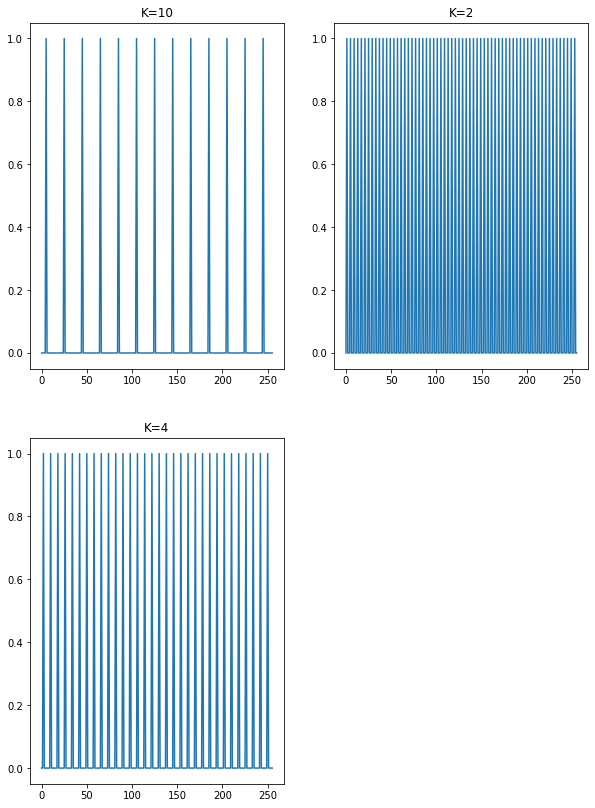

In [19]:
#Gráficas de la función de transferencia
plt.figure(figsize=(10,14))
plt.subplot(2,2,1)
plt.plot(ind,k10),plt.title("K=10")
plt.subplot(2,2,2)
plt.plot(ind,k2),plt.title("K=2")
plt.subplot(2,2,3)
plt.plot(ind,k4),plt.title("K=4")

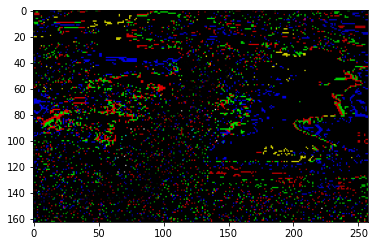

In [20]:
#La funcioón de transferencia x la imagen original. 
plt.imshow(img*k10[img])

###### 5º Aplicar la transformada gamma sobre las imagenes "low_contrast2.png" y "low_contrast3.png". Comparar con los mejores resultados de aplicar la función imadjust.

(<matplotlib.axes._subplots.AxesSubplot at 0x1c1b4026288>,
 Text(0.5, 1.0, 'Salida de imadjust'))

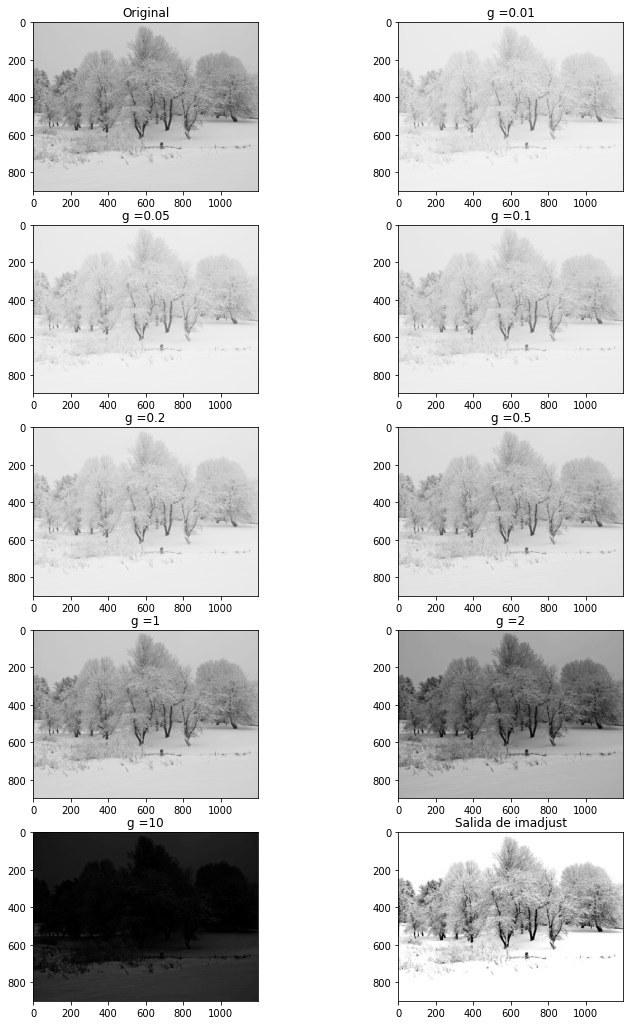

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
I=cv2.imread('low_contrast2.jpg',0)
fgamma=dict()
ind=np.arange(256)

for g in [0.01,0.05,0.1,0.2,0.5,1, 2, 10]:
    fgamma[g]= pow((ind/255),g)*255
    
plt.figure(figsize=(12,18))
plt.subplot(5,2,1),plt.imshow(I,'gray'),plt.title("Original")

pos=2
for x,v in fgamma.items():
    Inew = v[I]
    txt="g ="+str(x)
    plt.subplot(5,2,pos),plt.imshow(Inew,'gray'),plt.title(txt)
    pos+=1
    
out = imadjust(I,[0.25,0.75], [0,1])
plt.subplot(5,2,10),plt.imshow(out,'gray'),plt.title("Salida de imadjust")

Podemos apreciar como con la salida de imadjust se diferencia mejor entre el tronco de los arboles y sus hojas, se aprecian las hojas del suelo pero se vuelve demasiado blanco tanto el suelo como el cielo. Por contra, en la transformada de gamma se oscurece a medida que aumenta el gamma siendo que con g=2 se consigue la mejor definición con esta transformada. Aunque un poco oscura, se aprecia el relieve de las hojas, sombras y todos los componentes de la imagen. A medida que bajamos el gamma se vuelve más tenúe la imagen.

(<matplotlib.axes._subplots.AxesSubplot at 0x1c1b7fb61c8>,
 Text(0.5, 1.0, 'Salida de imadjust'))

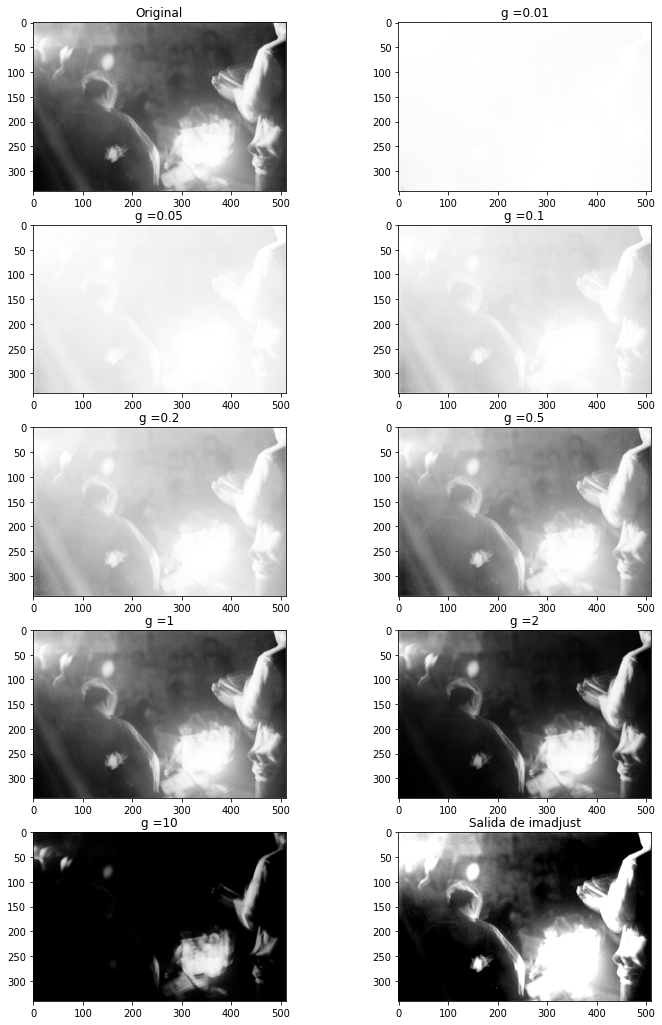

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
I=cv2.imread('low_contrast3.jpg',0)
fgamma=dict()
ind=np.arange(256)

for g in [0.01,0.05,0.1,0.2,0.5,1, 2, 10]:
    fgamma[g]= pow((ind/255),g)*255
    
plt.figure(figsize=(12,18))
plt.subplot(5,2,1),plt.imshow(I,'gray'),plt.title("Original")

pos=2
for x,v in fgamma.items():
    Inew = v[I]
    txt="g ="+str(x)
    plt.subplot(5,2,pos),plt.imshow(Inew,'gray'),plt.title(txt)
    pos+=1
    
out = imadjust(I,[0.25,0.75], [0,1])
plt.subplot(5,2,10),plt.imshow(out,'gray'),plt.title("Salida de imadjust")

En esta ocasión podemos volver a apreciar como a la hora de aumentar el gamma se oscurece la imagen. Sin embargo en esta ocasión, quizás para apreciar mejor el fondo nos convendría disminuirlo un poco, por ello, en mi opinión con el valor g=0.5 conseguimos la mejor definición. Se aprecia el público en el fondo de izquierda a derecha. Sin embargo, con la salida del imadjust, se pierde la visión sobre el público sitúado de pie en el margen derecho de la izquierdo, tras la hoguera. 

###### 6º Ecualizar la imagen "patio_leones.ppm"

(-0.5, 409.5, 306.5, -0.5)

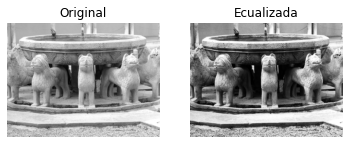

In [23]:
img=cv2.imread('patio_leones.ppm',0)
#Ecualizamos la imagen.
equ = cv2.equalizeHist(img)
plt.subplot(1,2,1)
plt.imshow(img, "gray")
plt.title("Original")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(equ,"gray")
plt.title("Ecualizada")
plt.axis("off")

###### 7º Lo que oculta una imagen. Estas dos imágenes

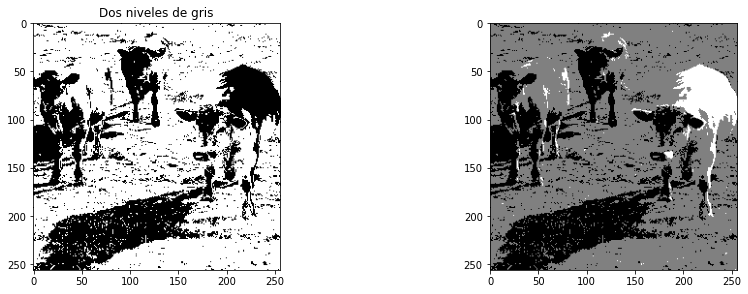

In [29]:
castillo = cv2.imread("Castillo_oculto2bits.png")

#Función para descubrir las vacas, recibe por parametro la imagen y los niveles de grises resultantes
def discoverCows(img,levels=2):
    img_hidden = img.copy()
    #Si el formato ya es en escala de grises no se transforma
    if(len(img_hidden.shape) > 2):
        img_hidden = cv2.cvtColor(img_hidden, cv2.COLOR_BGR2GRAY)
    #Si queremos que la imagen resultante sea en dos niveles de grises buscaremos aquellos bits pares y los convertiremos en blanco
    #y si es impar en negro
    if(levels==2):
        for i in range(img_hidden.shape[0]):
            for j in range(img_hidden.shape[1]):
                if(img_hidden[i,j] % 2):
                    img_hidden[i,j] = 255
                else:
                    img_hidden[i,j] = 0
    #En caso de necesitar tres niveles de grises nos ayudaremos del modulo 4, en función del resto repartiremos entre blanco, gris y negro.
    else:
        img_hidden = img_hidden % 4

        img_hidden[img_hidden == 0] = 0
        img_hidden[img_hidden == 1] = 128
        img_hidden[img_hidden == 2] = 255
    
    return(img_hidden)


castillo_oculto = discoverCows(castillo,2)
castillo_oculto2 = discoverCows(castillo,3)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(castillo_oculto,"gray")
plt.title("Dos niveles de gris")
plt.subplot(2,2,2)
plt.imshow(castillo_oculto2, "gray")

In [26]:
#Función para volver par o impar un valor entrante
def unpar(n):
    if(n % 2 == 0):
        n=n+1
    return(n)   

def par(n):
    if(n % 2 != 0):
        n = n-1
    return(n)

In [27]:
#Función para modificar el modulo 
def mod4(n,v):
    if(v == 1):
        n = n-1
    if(v==2):
        n=n-2
    return(n)

Text(0.5, 1.0, 'Tres niveles de gris')

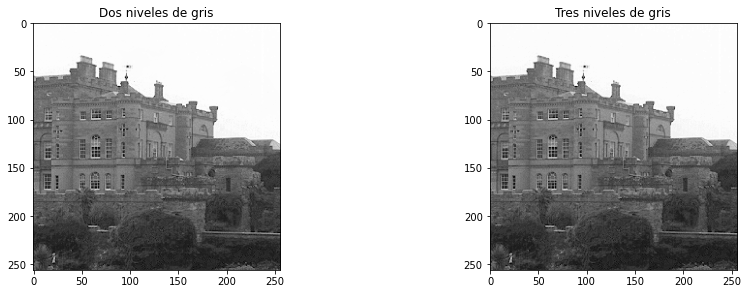

In [33]:
castillo_original = cv2.cvtColor(cv2.imread("castillo.pgm"),cv2.COLOR_BGR2GRAY)
#Función de esconder las vacas, recibe la imagen a esconder y los niveles de grises de la misma
def hideCows(img, levels=2):
    img_hide = img.copy() 
    
    #Dividiremos entre el modulo y en función de si para el pixel de la imagen de la vaca es par o impar forcaremos 
    #a que el pixel en la imagen del castillo también sea par o impar de modo que no se note apenas el cambio y podamos revertirlo
    #en el futuro
    if(levels==2):
        img_hide = img_hide % 2
        for i in range(img_hide.shape[0]):
            for j in range(img_hide.shape[1]):
                if(img_hide[i,j] == 0):
                    img_hide[i,j] = par(castillo_original[i,j])
                else:
                    img_hide[i,j] = unpar(castillo_original[i,j])
    #Tal como ocurre con dos niveles de gris, forzaremos que se repita el mismo modulo en la imagen de la vaca y la del castillo para
    #poder revertirlo en el futuro
    else:
        img_hide = img_hide % 4
        
        for i in range(img_hide.shape[0]):
            for j in range(img_hide.shape[1]):
                img_hide[i,j] = mod4(castillo_original[i,j], castillo_original[i,j]%4)
    
    return(img_hide)


vacas_oculto = hideCows(castillo_oculto,2)
vacas_oculto2 = hideCows(castillo_oculto,4)
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.imshow(vacas_oculto,"gray")
plt.title("Dos niveles de gris")
plt.subplot(2,2,2)
plt.imshow(vacas_oculto2, "gray")
plt.title("Tres niveles de gris")

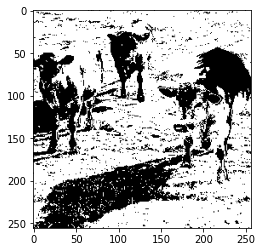

In [34]:
#Si a partir de la imagen del castillo creada tratamos de extraer la de la vaca el resultado es el deseado
plt.imshow(discoverCows(vacas_oculto,2),"gray")